In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *

## Dataset Setup

In [7]:
pretrained = True
freeze = False
num_classes = 200
num_attributes = 13
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False

In [8]:
BASE_DIR = ""
data_dir_small = "../cem/cem/CUB_small/preprocessed/"
data_dir_blur = "../cem/cem/CUB_blur/preprocessed/"
data_dir_tag = "../cem/cem/CUB_tag/preprocessed/"

In [9]:
train_data_path = os.path.join(BASE_DIR, data_dir_small, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [10]:
train_loader_small = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_small = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [11]:
train_data_path = os.path.join(BASE_DIR, data_dir_blur, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [12]:
train_loader_blur = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_blur = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [13]:
train_data_path = os.path.join(BASE_DIR, data_dir_tag, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [23]:
a = pickle.load(open(train_data_path,"rb"))
a[0]

{'id': 41,
 'img_path': 'CUB_tag/images/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0077_796114.jpg',
 'class_label': 0,
 'attribute_label': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 'attribute_certainty': [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,


In [14]:
train_loader_tag = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path,is_training=False)
val_loader_tag = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [15]:
for idx,i in enumerate(train_loader_small):
    x_small,y_small,c_small = i
    break

In [16]:
for idx,i in enumerate(train_loader_blur):
    x_blur,y_blur,c_blur = i
    break

In [28]:
for idx,i in enumerate(train_loader_tag):
    x_tag,y_tag,c_tag = i
    break

In [18]:
y_tag

tensor([ 0,  1,  1,  5,  7,  0,  2, 10, 11,  0, 11,  7, 10, 10,  7,  4, 11,  5,
        10,  3,  5,  5,  7,  6,  0,  5,  1,  9,  6,  4,  6,  0,  6,  1,  0,  7,
        10, 10,  2,  0,  0,  0, 10,  7,  1,  0,  4, 11,  6,  7,  5,  6,  9,  5,
         6,  2,  3, 11,  4,  8,  9, 10, 10,  6])

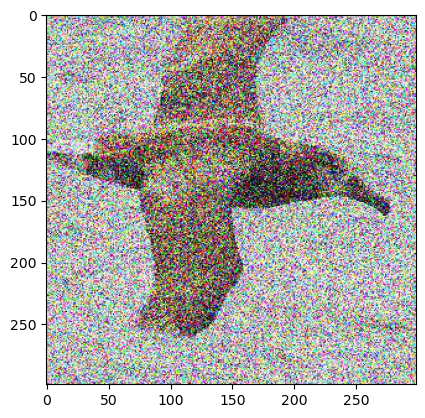

In [19]:
plot_image(x_small[0])

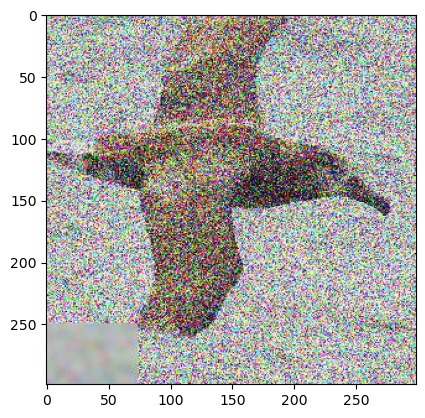

In [20]:
plot_image(x_blur[0])

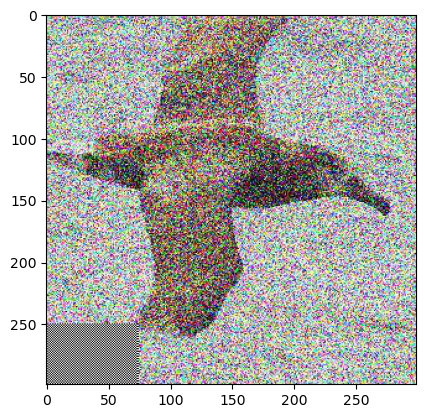

In [29]:
plot_image(x_tag[0])

## Load models

In [21]:
joint_location_small = "ConceptBottleneck/results/CUB_small/joint/best_model_42.pth"
joint_model_small = torch.load(joint_location_small,map_location=torch.device('cpu'))
joint_model_small.eval()

End2EndModel(
  (first_model): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)

In [22]:
joint_location_blur = "ConceptBottleneck/results/CUB_blur/joint/best_model_42.pth"
joint_model_blur = torch.load(joint_location_blur,map_location=torch.device('cpu'))
joint_model_blur.eval()

End2EndModel(
  (first_model): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)

In [23]:
joint_location_tag = "ConceptBottleneck/results/CUB_tag/joint/best_model_42.pth"
joint_model_tag = torch.load(joint_location_tag,map_location=torch.device('cpu'))
joint_model_tag.eval()

End2EndModel(
  (first_model): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)

In [24]:
get_accuracy(joint_model_small,run_joint_model,val_loader_small)

tensor(0.9420)

In [25]:
get_accuracy(joint_model_blur,run_joint_model,val_loader_blur)

tensor(0.2754)

In [26]:
get_accuracy(joint_model_tag,run_joint_model,val_loader_tag)

tensor(0.1304)

In [27]:
get_accuracy_by_class(joint_model_small,run_joint_model,val_loader_small)

{8: 1.0,
 0: 1.0,
 4: 1.0,
 2: 0.8571428571428571,
 10: 1.0,
 11: 1.0,
 3: 1.0,
 7: 0.8333333333333334,
 6: 0.5,
 1: 1.0,
 5: 0.6666666666666666,
 9: 1.0}

In [28]:
get_accuracy_by_class(joint_model_blur,run_joint_model,val_loader_blur)

{8: 0.5555555555555556,
 0: 1.0,
 4: 0.14285714285714285,
 2: 0.0,
 10: 0.0,
 11: 1.0,
 3: 0.0,
 7: 0.0,
 6: 0.0,
 1: 0.25,
 5: 0.3333333333333333,
 9: 0.25}

In [29]:
get_accuracy_by_class(joint_model_tag,run_joint_model,val_loader_tag)

{8: 0.0,
 0: 1.0,
 4: 0.0,
 2: 0.0,
 10: 1.0,
 11: 0.0,
 3: 0.0,
 7: 0.0,
 6: 0.0,
 1: 0.0,
 5: 0.0,
 9: 0.0}

## Spurious Scores

In [30]:
score = spurious_score(joint_model_tag,run_joint_model,'blue',val_loader_small,0)
score

tensor(1.)

In [31]:
score = spurious_score(joint_model_small,run_joint_model,'blue',val_loader_small,0)
score

tensor(0.)

In [32]:
score = spurious_score(joint_model_blur,run_joint_model,'blur',val_loader_small,0)
score

tensor(1.)

In [33]:
score = spurious_score(joint_model_small,run_joint_model,'blur',val_loader_small,0)
score

tensor(0.0154)

In [34]:
score = spurious_score(joint_model_tag,run_joint_model,'tag',val_loader_small,0)
score

tensor(0.0769)

In [35]:
score = spurious_score(joint_model_small,run_joint_model,'tag',val_loader_small,0)
score

tensor(0.)